#Some of the sources I used includes:

1. **[​​​​Tutorial: Text Classification in Python Using spaCy](https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/)** : where I got some examples for using Spacy for text classification.

2. **[Spooky NLP and Topic Modelling tutorial](https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial)** : One Kaggle Notebook with a very good tutorial about NLP processing

In [1]:
import pandas as pd
import spacy
import numpy as np


from spacy import displacy
import plotly.graph_objs as go
import plotly.offline as py
import imageio

from matplotlib import pyplot as plt

nlp = spacy.load('en')

train = pd.read_csv('train.zip')

In [2]:
grouped_df = train.groupby('author')
for name, group in grouped_df:
    print("Author name : ", name)
    cnt = 0
    for ind, row in group.iterrows():
        doc = nlp(row["text"])
        displacy.render(doc, style='ent', jupyter=True)
        #print(row["text"])
        cnt += 1
        if cnt == 5:
            break
    print("\n")

Author name :  EAP




Author name :  HPL




Author name :  MWS


In [3]:
displacy.render(doc, style='dep', jupyter=True)

In [4]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
data = [go.Bar(
            x = train.author.map(z).unique(),
            y = train.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
            text='Text entries attributed to Author'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [5]:
doc = nlp(train.text[1])

for token in doc:
  print(token.text, token.pos_, token.dep_, token.head.text)

It PRON nsubj occurred
never ADV neg once
once ADV advmod occurred
occurred VERB ROOT occurred
to ADP prep occurred
me PRON pobj to
that SCONJ mark be
the DET det fumbling
fumbling NOUN nsubj be
might VERB aux be
be AUX ccomp occurred
a DET det mistake
mere ADJ amod mistake
mistake NOUN attr be
. PUNCT punct occurred


In [6]:
for token in doc:
  print(token.text, token.pos_, token.dep_, token.head, token.head.pos_)

It PRON nsubj occurred VERB
never ADV neg once ADV
once ADV advmod occurred VERB
occurred VERB ROOT occurred VERB
to ADP prep occurred VERB
me PRON pobj to ADP
that SCONJ mark be AUX
the DET det fumbling NOUN
fumbling NOUN nsubj be AUX
might VERB aux be AUX
be AUX ccomp occurred VERB
a DET det mistake NOUN
mere ADJ amod mistake NOUN
mistake NOUN attr be AUX
. PUNCT punct occurred VERB


In [7]:
eap = train[train.author=="EAP"]["text"].values
hpl = train[train.author=="HPL"]["text"].values
mws = train[train.author=="MWS"]["text"].values

In [8]:
for text in eap:
    doc = nlp(text[])

SyntaxError: invalid syntax (<ipython-input-8-ef7c735df5e2>, line 2)

In [9]:
from collections import Counter
def pos_distri(author_texts, author_name):
    d = {'AUTHOR':'', 'VERB':0, 'NOUN':0, 'PRON':0, 'ADJ':0}
    for text in author_texts:
        doc = nlp(text)
        cnt = Counter([token.pos_ for token in doc])
        for pos in d.keys():
            if pos in cnt.keys():
                d[pos] = d[pos] + cnt[pos]
    d['AUTHOR'] = author_name
    return d
         
    

In [10]:
dict_eap = pos_distri(eap, 'EAP')
dict_hpl = pos_distri(hpl, 'HPL')
dict_mws = pos_distri(mws, 'MWS')

In [11]:
data_pos_qt = [dict_hpl['VERB'], dict_hpl['NOUN'], dict_hpl['PRON'], dict_hpl['ADJ']]
data_pos = ['VERB', 'NOUN', 'PRON', 'ADJ']
data_author = ['HPL']*4
data = [data_author, data_pos, data_pos_qt]
data_np = np.array(data)
df_pos = pd.DataFrame(data=np.array(data).transpose(), columns = ['Author', 'Part_of_speech', 'POS_QNT'])

In [12]:
data_pos = [dict_mws['VERB'], dict_mws['NOUN'], dict_mws['PRON'], dict_mws['ADJ']]
data_author = ['MWS']*4
data_pos_qt = ['VERB', 'NOUN', 'PRON', 'ADJ']
data = [data_author, data_pos, data_pos_qt]
data_np = np.array(data)
df_pos = df_pos.append(pd.DataFrame(data=np.array(data).transpose(), columns = ['Author', 'POS_QNT', 'Part_of_speech']), ignore_index=True)

In [13]:
data_pos = [dict_eap['VERB'], dict_eap['NOUN'], dict_eap['PRON'], dict_eap['ADJ']]
data_pos_qt = ['VERB', 'NOUN', 'PRON', 'ADJ']
data_author = ['EAP']*4
data = [data_author, data_pos, data_pos_qt]
data_np = np.array(data)
df_pos = df_pos.append(pd.DataFrame(data=np.array(data).transpose(), columns = ['Author', 'POS_QNT', 'Part_of_speech']), ignore_index=True)

In [14]:
df_pos

,Author,Part_of_speech,POS_QNT
0,HPL,VERB,20573
1,HPL,NOUN,30757
2,HPL,PRON,10214
3,HPL,ADJ,14209
4,MWS,VERB,24414
5,MWS,NOUN,32579
6,MWS,PRON,14926
7,MWS,ADJ,11979
8,EAP,VERB,24025
9,EAP,NOUN,38605


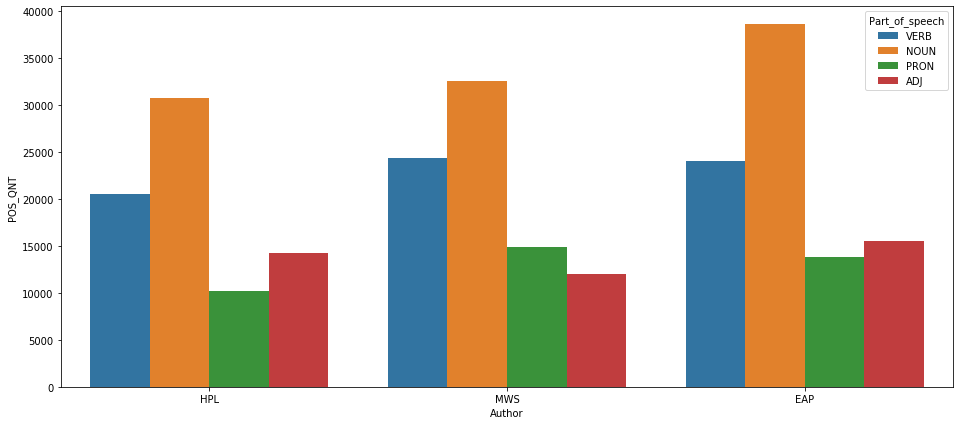

In [17]:
import seaborn as sns
plt.figure(figsize=(16,7))


bar_gen = sns.barplot(x = 'Author', y = 'POS_QNT', hue = 'Part_of_speech',data = df_pos)

In [38]:
text_qnt = len(hpl)
pos_qnt = df_pos[df_pos['Author']=='HPL']['POS_QNT']


columns_norm1 = [int(pos)/text_qnt for pos in pos_qnt]

In [39]:
text_qnt = len(mws)
pos_qnt = df_pos[df_pos['Author']=='MWS']['POS_QNT']


columns_norm2 = [int(pos)/text_qnt for pos in pos_qnt]

In [40]:
text_qnt = len(eap)
pos_qnt = df_pos[df_pos['Author']=='EAP']['POS_QNT']


columns_norm3 = [int(pos)/text_qnt for pos in pos_qnt]

In [41]:
column_norm = columns_norm1 + columns_norm2 + columns_norm3

In [42]:
df_pos['POS_QNT_NORM'] = column_norm

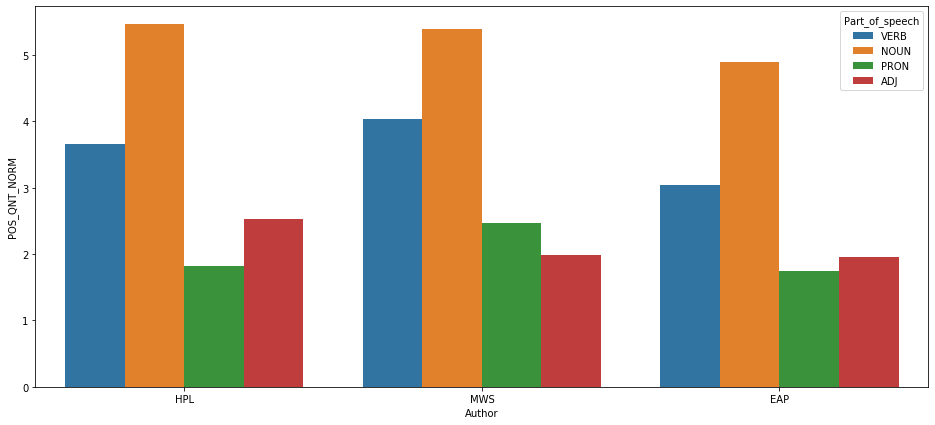

In [44]:
import seaborn as sns
plt.figure(figsize=(16,7))


bar_gen = sns.barplot(x = 'Author', y = 'POS_QNT_NORM', hue = 'Part_of_speech',data = df_pos)

In [43]:
df_pos

,Author,Part_of_speech,POS_QNT,POS_QNT_NORM
0,HPL,VERB,20573,3.650932
1,HPL,NOUN,30757,5.458208
2,HPL,PRON,10214,1.812600
3,HPL,ADJ,14209,2.521562
4,MWS,VERB,24414,4.039378
5,MWS,NOUN,32579,5.390304
6,MWS,PRON,14926,2.469557
7,MWS,ADJ,11979,1.981966
8,EAP,VERB,24025,3.041139
9,EAP,NOUN,38605,4.886709


In [45]:
text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

In [51]:
mytokens1 = nlp(text)
mytokens2 = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens1 ]

In [58]:
[ word.lemma_.lower() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens1 ] == mytokens2

False

In [48]:
mytokens

['when',
 'learn',
 'datum',
 'science',
 ',',
 'you',
 'should',
 'not',
 'get',
 'discourage',
 '!',
 '',
 'challenge',
 'and',
 'setback',
 'be',
 'not',
 'failure',
 ',',
 'they',
 'be',
 'just',
 'part',
 'of',
 'the',
 'journey',
 '.',
 'you',
 'have',
 'get',
 'this',
 '!']

In [19]:
def pos_count(author, pos):
  list_pos = []
  tmp = []
  for t in author[:100]:
    doc = nlp(t)
    tmp = [[w.text, w.lemma_] for w in doc if w.pos_ == pos]
    list_pos += tmp
  return pd.DataFrame(list_pos, columns=['Word', 'Lemma']).drop_duplicates() 


In [20]:
eap_verb = pos_count(eap, 'VERB')
hpl_verb = pos_count(hpl, 'VERB')
mws_verb = pos_count(mws, 'VERB')

In [21]:
from PIL import Image
import urllib, cStringIO
from StringIO import StringIO

ModuleNotFoundError: No module named 'cStringIO'

In [22]:
#response = requests.get('https://lh6.googleusercontent.com/proxy/sCfqJArSkxuvuBvKPBIMlcqs4vmQLyEoQjgmol6C3jeEB_aZAK_DcSCnn22A5iPVSJWPFFTuAmpYqZdxT4iZBJz1')
file = cStringIO.StringIO(urllib.urlopen('https://lh6.googleusercontent.com/proxy/sCfqJArSkxuvuBvKPBIMlcqs4vmQLyEoQjgmol6C3jeEB_aZAK_DcSCnn22A5iPVSJWPFFTuAmpYqZdxT4iZBJz1').read())
img = Image.open(file)
hpl_mask = np.array(img)


NameError: name 'cStringIO' is not defined

In [23]:
hpl_mask = np.array(Image.open('/content/drive/My Drive/Notebooks/Kaggle/spooky-author-identification/hpl.png'))


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Notebooks/Kaggle/spooky-author-identification/hpl.png'

In [24]:
response = requests.get('https://cdn.pixabay.com/photo/2017/01/31/17/00/animal-2025562_960_720.png')
eap_mask = np.array(Image.open(BytesIO(response.content)))

NameError: name 'requests' is not defined

In [25]:
response = requests.get('https://lh3.googleusercontent.com/proxy/sGk-m5Uc4YozjoUMnO8w9QvPUByPMk7cx2hdmTOLIReq61qU-a21KmxC3zf3ElN9b20VBvMu7deRmobQw-psix99SYZgoaC3mSj3X1nKTgApHI4bS1avvjaN_LDAL65_fPusaeg1t7ARNpyJ7W_IMzM06ZMrZwS37RXUQjvDEW5HAarr_LgCDtNi')
mws_mask = np.array(Image.open(BytesIO(response.content)))

NameError: name 'requests' is not defined

In [26]:
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [27]:
# The wordcloud of Cthulhu/squidy thing for HP Lovecraft
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
               mask=hpl_mask, max_font_size= 40)
wc.generate(" ".join(hpl_verb.Lemma))
plt.title("HP Lovecraft (Cthulhu-Squidy)", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

NameError: name 'WordCloud' is not defined

In [28]:
# The wordcloud of Cthulhu/squidy thing for HP Lovecraft
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
               mask=eap_mask, max_font_size= 40)
wc.generate(" ".join(eap_verb.Lemma))
plt.title("HP Lovecraft (Cthulhu-Squidy)", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

NameError: name 'WordCloud' is not defined

In [29]:
# The wordcloud of Cthulhu/squidy thing for HP Lovecraft
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
               mask=mws_mask, max_font_size= 40)
wc.generate(" ".join(mws_verb.Lemma))
plt.title("HP Lovecraft (Cthulhu-Squidy)", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

NameError: name 'WordCloud' is not defined